In [429]:
import numpy as np

In [430]:
class LogisticRegression():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None 
    
    def sigmoid(self, x):
        x = np.float128(x)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        class_pred = np.array([[0, y] if y <= 0.5 else [1, y] for y in y_pred])
        return class_pred

In [431]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [432]:
ds = datasets.load_breast_cancer()
X, y = ds.data, ds.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

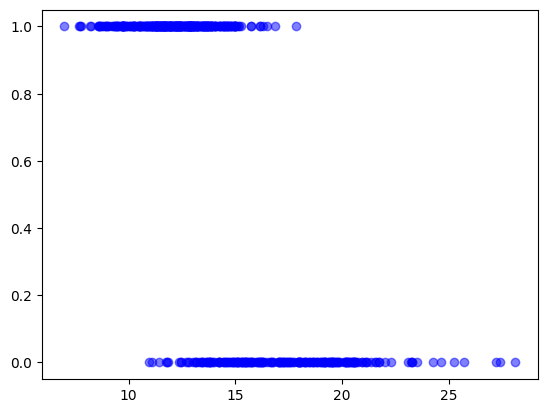

In [433]:
fig = plt.figure()
plt.scatter(X[:, 0], y, alpha=0.5, color='blue', marker='o')
plt.show()

In [434]:
clf = LogisticRegression(lr=0.0001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

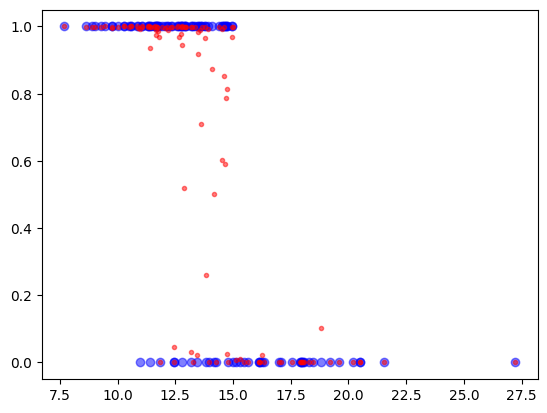

In [435]:
scatter_test = plt.scatter(X_test[:, 0], y_test, alpha=0.5, color='blue', marker='o')
scatter_result = plt.scatter(X_test[:, 0], y_pred[:, 1], alpha=0.5, color='red', marker='.')
plt.show()

In [436]:
print(f'Accuracy = {np.sum(y_pred[:, 0] == y_test) / len(y_test):.2f} ')

Accuracy = 0.94 


In [437]:
# The end